## **📌 LDA vs PCA**
Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are both dimensionality reduction techniques but serve different purposes.  

| Feature | **PCA (Principal Component Analysis)** | **LDA (Linear Discriminant Analysis)** |
|---------|--------------------------------------|--------------------------------------|
| **Purpose** | Reduces dimensionality by finding directions (principal components) that maximize variance in the data. | Reduces dimensionality while maximizing class separability for classification tasks. |
| **Supervised/Unsupervised** | Unsupervised | Supervised (requires class labels) |
| **How It Works** | Finds new axes (principal components) that capture maximum variance in the dataset. | Finds axes that maximize the separation between different classes. |
| **Mathematical Basis** | Uses eigenvalues and eigenvectors of the covariance matrix to identify principal components. | Uses the scatter matrices to maximize the ratio of inter-class variance to intra-class variance. |
| **Usage** | General-purpose dimensionality reduction for any data type. | Best suited for classification problems where class labels are available. |
| **Interpretability** | Captures variance but does not consider class information. | Considers class labels, making it better for classification tasks. |
| **Common Applications** | Image compression, noise reduction, exploratory data analysis. | Face recognition, pattern classification. |

---

## **📌 Feature Selection vs Feature Extraction vs Feature Elimination**
Feature engineering involves choosing the right set of features for machine learning models. Here’s how **feature selection, feature extraction, and feature elimination** differ:

| Feature | **Feature Selection** | **Feature Extraction** | **Feature Elimination** |
|---------|----------------------|----------------------|----------------------|
| **Definition** | Selecting the most relevant features from the dataset. | Transforming existing features into a new feature space. | Removing irrelevant or redundant features from the dataset. |
| **Goal** | Improve model performance by removing noisy or redundant features. | Create new features that better represent the data. | Reduce overfitting and improve model efficiency. |
| **How It Works** | Uses statistical tests, mutual information, or algorithms like Recursive Feature Elimination (RFE). | Uses mathematical transformations (PCA, LDA, Autoencoders). | Iteratively removes less important features based on model performance. |
| **Techniques** | Filter methods (Chi-Square, ANOVA), Wrapper methods (RFE), Embedded methods (LASSO). | PCA, LDA, Autoencoders, Word Embeddings in NLP. | Recursive Feature Elimination (RFE), Univariate selection, Dropout in deep learning. |
| **When to Use?** | When raw features have meaningful information. | When raw features are too high-dimensional or correlated. | When many features do not contribute significantly to model performance. |
| **Example** | Choosing top 10 most correlated features from a dataset. | Using PCA to reduce 100 features into 10 principal components. | Using decision tree importance scores to drop unimportant features. |

---

### **📌 Summary**
- **Use PCA when**: You need to reduce dimensionality without considering class labels.  
- **Use LDA when**: You need dimensionality reduction while preserving class separability.  
- **Use Feature Selection when**: You want to keep only the best features.  
- **Use Feature Extraction when**: You want to create new features from existing data.  
- **Use Feature Elimination when**: You want to remove unnecessary or redundant features.  


---

## **1. Principal Component Analysis (PCA)**
🔹 **Why Standardize Before Splitting?**  
- PCA is an **unsupervised technique** used for **dimensionality reduction**.  
- It finds new axes (principal components) based on variance.  
- **If we don’t standardize first, features with large scales (e.g., income in thousands vs. age in years) will dominate the principal components.**  

🔹 **Why Before Splitting?**  
- If we standardize **after splitting**, the mean and variance of train and test data might be different.  
- PCA computes **principal components based on the training data**.  
- The test set must be transformed using the **same principal components** derived from the training set.  

✅ **Correct approach:**  
1️⃣ Standardize the dataset (mean = 0, variance = 1).  
2️⃣ Apply PCA on the entire dataset.  
3️⃣ Split into training and test sets.  

---

## **2. Linear Discriminant Analysis (LDA)**
🔹 **Why Standardize After Splitting?**  
- LDA is a **supervised technique** used for **classification**.  
- It finds directions (linear discriminants) **that best separate classes** rather than just maximizing variance.  

🔹 **Why After Splitting?**  
- LDA uses **both feature distribution and class labels** to compute discriminant axes.  
- If we standardize before splitting, we leak **information about the entire dataset**, potentially leading to **data leakage**.  
- Instead, we must standardize using only the **training data** so the test set remains unbiased.  

✅ **Correct approach:**  
1️⃣ Split the dataset into training and test sets.  
2️⃣ Standardize the training data (compute mean & variance).  
3️⃣ Apply LDA on the training set.  
4️⃣ Use the **same standardization parameters** (mean & variance from training) on the test set.  

---

## **Key Takeaway**  
| Method | When to Standardize | Why? |
|--------|-------------------|------|
| **PCA** (Unsupervised) | **Before Splitting** | Avoid data leakage & ensure principal components are computed properly |
| **LDA** (Supervised) | **After Splitting** | Prevent data leakage and ensure class separation is computed correctly |

Would you like a **Python implementation** of PCA and LDA with standardization? 🚀

### **What Does a 95% Cumulative Variance Threshold Mean in PCA?**  

When we set a **cumulative variance threshold of 95%** in **Principal Component Analysis (PCA)**, it means:  

✅ **We select the minimum number of Principal Components (PCs) that together explain at least 95% of the total variance in the dataset.**  

### **Breaking It Down:**
- PCA transforms **original features** into **Principal Components (PCs)**, which are ordered by how much variance they capture.  
- The **first PC** captures the most variance, the **second PC** captures the second most, and so on.  
- The **cumulative variance** is the sum of the variance explained by selected PCs.  
- Setting a **95% threshold** means choosing enough PCs until their combined variance contribution reaches at least **95% of the total variance** in the dataset.

---

### **Example with a Dataset:**
| **Principal Component** | **Explained Variance (%)** | **Cumulative Variance (%)** |
|-------------------------|----------------------------|------------------------------|
| PC1                     | 50%                        | 50%                          |
| PC2                     | 30%                        | 80%                          |
| PC3                     | 10%                        | 90%                          |
| PC4                     | 5%                         | 95% ✅ *(Threshold Reached!)* |
| PC5                     | 3%                         | 98%                          |
| PC6                     | 2%                         | 100%                         |

### **Interpretation:**
- In this case, **PC1, PC2, PC3, and PC4 together explain 95% of the variance**.  
- Any remaining PCs contribute very little and can be ignored without significant information loss.  

---

### **Python Code to Apply 95% Variance Threshold in PCA**
```python
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset (5 features, 100 samples)
np.random.seed(42)
X = np.random.rand(100, 5) * 100  

# Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Set 95% variance threshold
X_pca = pca.fit_transform(X_standardized)

# Print results
print(f"Original feature count: {X.shape[1]}")
print(f"Selected PC count (to retain 95% variance): {X_pca.shape[1]}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative Variance: {np.cumsum(pca.explained_variance_ratio_)}")
```

---

### **Why Use a 95% Threshold?**
✅ **Reduces dimensionality** → Makes models faster while keeping most information.  
✅ **Removes noise** → Low-variance components often represent noise.  
✅ **Avoids overfitting** → Reduces unnecessary complexity in the model.  

Would you like me to **visualize the cumulative variance plot** for PCA? 📊🚀

---
# **PCA on Digits Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
from sklearn.datasets import load_digits

In [3]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
'''
check what is there in the dataset
'''
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
'''
create a dataframe using data as rows and feature_names as column names
'''
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)

In [6]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
print("Rows : ", df.shape[0])
print("Columns : ",df.shape[1])

Rows :  1797
Columns :  64


we are using 8 * 8 grid i.e total = 64, thats the the reason we have 64 col

In [8]:
df["Target"] = dataset.target

In [9]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [10]:
print("Rows : ", df.shape[0])
print("Columns : ",df.shape[1])

Rows :  1797
Columns :  65


In [11]:
'''
checking pixel values for target present at index 0
'''
print("Target is ", dataset.target[0])
dataset.data[0]

Target is  0


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
'''
reshaping the pixels into 8x8 matrix = 64 pixels so it could form an image
'''
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

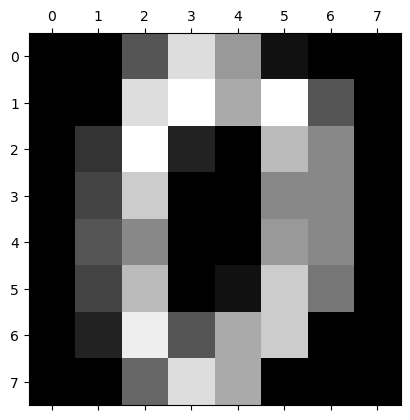

In [13]:
'''
plotting the matrix into an image, on gray scale numbers 0 to 255 represent black to white scale.
'''
plt.gray() #Set the colormap to 'gray'. This changes the default colormap as well as the colormap of the current image if there is one.
plt.matshow(dataset.data[0].reshape(8,8))
plt.show()

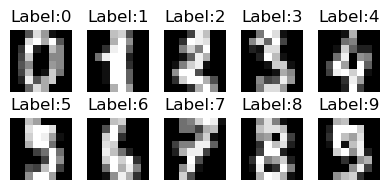

In [14]:
'''
PLot all target images
'''
num_images = 10

plt.figure(figsize=(4,2))
for i in range(num_images):
    plt.subplot(2,5,i+1)
    plt.imshow(dataset.images[i], cmap = 'gray')
    plt.title(f'Label:{dataset.target[i]}')
    plt.axis("off")
plt.tight_layout()
plt.show()    

In [15]:
'''
Spliiting data into independent and dependent variables
'''
x = df.iloc[:,:-1]
y = df["Target"]

In [16]:
x.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [17]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: Target, Length: 1797, dtype: int32

In [18]:
y.shape

(1797,)

In [19]:
'''
Standardize the data
If we don’t standardize first, features with large scales (e.g., income in thousands vs. age in years) will dominate the principal components.
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [20]:
x_scaled = sc.fit_transform(x) 

In [21]:
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [22]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [23]:
'''
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a new coordinate system 
where the most variance is captured in fewer dimensions. The covariance matrix and transpose play key roles in this process.

Transpose is Also Used for Projection
- After finding principal components, we project data onto the new basis.
- This is done using the dot product with eigenvectors:

                𝑍 = 𝑋 ⋅ 𝑊
            
𝑊 is the eigenvector matrix (Principal Component Axes).
𝑍 is the transformed dataset.

📌 Key Step in PCA:
Use transpose for matrix operations like computing covariance and transforming data into a new coordinate system.
'''
x_transposed = pd.DataFrame(x_scaled).T # transposing the amtrix for covariance
x_transposed

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.208293,-0.249010,-2.078218,0.208293,-2.306869,0.894246,-0.706312,-1.620916,0.894246,-0.020358,...,0.208293,-2.764171,0.894246,-0.020358,-2.535520,0.436944,0.894246,-0.706312,-0.020358,-0.020358
60,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
61,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
62,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136


In [24]:
'''
Creating Covariance Matrix
🔹 How the Covariance Matrix Helps in PCA
- The eigenvectors of the covariance matrix give the principal components.
- The eigenvalues tell us how much variance each principal component captures.
- The largest eigenvalue corresponds to the first principal component (direction of max variance).

📌 Key Step in PCA:
Compute covariance matrix to identify correlated features and determine directions of maximum variance.
'''
cov_matrix = np.cov(x_transposed)
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,...,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.394499,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.707913,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.602602,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774


In [25]:
'''
Eigen Values and Eigen Vectors
- Eigen Vectors : Directiosn in which data is pread the most
- Eigen Values  : Magnitude of spread, i.e how much info or variance is captured in that direction

in pca we selct the pc eith the highest variance
'''
eig_values, eig_vectors = np.linalg.eig(cov_matrix) 

In [26]:
pd.DataFrame(eig_values)

,0
0,7.344776
1,5.835491
2,5.153961
3,3.966236
4,2.966345
...,...
59,0.200091
60,0.189835
61,0.000000
62,0.000000


In [27]:
pd.DataFrame(eig_vectors)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182234,-0.047027,0.023588,-0.178153,0.029978,-0.231723,0.108310,-0.125524,-0.213820,-0.059834,...,0.039356,-0.036629,0.082404,0.052290,0.197267,0.024853,0.052605,0.0,0.0,0.0
2,0.285868,-0.059565,-0.056799,-0.156129,0.014666,-0.119875,0.004755,-0.006178,-0.120140,-0.007681,...,-0.080164,0.176636,0.091203,-0.001822,-0.129372,-0.069592,-0.090823,0.0,0.0,0.0
3,0.220370,0.020804,-0.040464,-0.167800,-0.043716,0.100392,-0.233717,0.033408,0.101895,0.021639,...,0.125306,-0.224852,-0.089657,0.040788,-0.148353,0.052446,-0.323498,0.0,0.0,0.0
4,-0.025170,-0.155903,-0.067065,0.000009,0.139993,0.093471,0.039540,-0.046161,0.093102,-0.005066,...,0.049967,-0.024456,0.039529,0.012110,-0.072823,-0.057241,0.048470,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.194449,0.009905,-0.083464,-0.171490,-0.100375,0.086503,-0.135319,0.098852,0.115978,0.105825,...,-0.067003,0.101720,-0.245611,-0.069682,0.336075,0.080163,0.138750,0.0,0.0,0.0
60,0.017774,0.251934,-0.062455,0.154438,0.003774,-0.111832,0.172848,0.055067,0.154210,0.100353,...,-0.116854,0.219353,0.196726,0.048100,-0.189613,-0.081401,-0.036926,0.0,0.0,0.0
61,0.103198,0.242618,-0.022280,0.252432,-0.094738,-0.057756,0.032155,-0.034265,0.027141,0.036675,...,0.193102,-0.023445,0.152260,-0.131265,-0.019375,-0.033929,-0.168659,0.0,0.0,0.0
62,0.119811,0.165089,0.100366,0.160720,-0.244026,-0.028957,-0.077612,0.164484,-0.144245,-0.057176,...,0.067240,0.095552,-0.207269,0.284186,0.086148,-0.141619,0.094642,0.0,0.0,0.0


In [28]:
total = sum(eig_values) # i.e total variance, information gain
total

61.033964365256345

In [29]:
variance_explained = [(i/total)*100 for i in sorted(eig_values, reverse = True)]
variance_explained

[12.033916097734886,
 9.561054403097895,
 8.44441489262453,
 6.49840790752416,
 4.860154875966409,
 4.214119869271929,
 3.942082803567385,
 3.3893809246383215,
 2.998221011625218,
 2.9320025512521997,
 2.781805463550303,
 2.577055092581982,
 2.275303315764246,
 2.227179739514353,
 2.1652294318492387,
 1.9141666064421228,
 1.7755470851682225,
 1.6380692742844125,
 1.5964601688623612,
 1.4891911870878187,
 1.3479695658179476,
 1.2719313702347868,
 1.1658373505919573,
 1.0576465985363315,
 0.9753159471981139,
 0.9445589897320046,
 0.8630138269707254,
 0.8366428536685164,
 0.7976932484112418,
 0.7464713709260706,
 0.7255821513702764,
 0.6919112454811739,
 0.6539085355726215,
 0.6407925738459798,
 0.5913841117223494,
 0.5711624052235321,
 0.5236368034166363,
 0.4818075864451432,
 0.453719259858452,
 0.4231627532327827,
 0.4060530699790319,
 0.397084808275823,
 0.3564933031426158,
 0.3407871814703038,
 0.3278353352879546,
 0.3110320073453649,
 0.2885752941089419,
 0.2764892635235427,
 0.2591

In [30]:
'''
Cumulative Explained Variance will show the total variance explained untill that feature and we generally take 95% or more so that .
'''
cumulative_variance_explained = np.cumsum(variance_explained)
pd.DataFrame(cumulative_variance_explained)

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
...,...
59,99.917465
60,100.000000
61,100.000000
62,100.000000


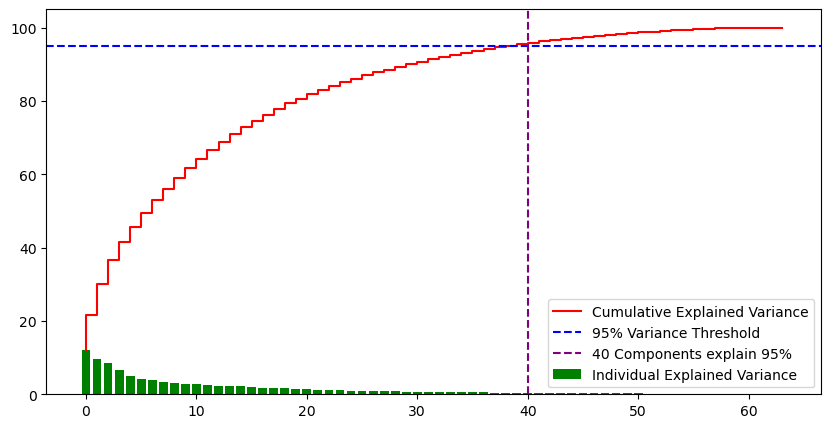

In [31]:
'''
The cumulative variance explained graph help us make informed decisions about the number of principal components 
to use by visualizing the trade-off between dimensionality and variance retained.
'''
plt.figure(figsize = (10,5))
plt.bar(range(len(variance_explained)), variance_explained,label = 'Individual Explained Variance', color = 'g')
plt.step(range(len(cumulative_variance_explained)), cumulative_variance_explained,label = 'Cumulative Explained Variance', color = 'r')
# Fixing the 95% threshold calculation
n_components_95 = np.where(cumulative_variance_explained >= 95)[0][0] + 1  

# Plot the threshold line at 95% variance
plt.axhline(y=95, color='blue', linestyle='--', label='95% Variance Threshold')

# Vertical line at n_components_95 (should be correct now)
plt.axvline(x=n_components_95, color='purple', linestyle='--', label=f'{n_components_95} Components explain 95%')
plt.legend()

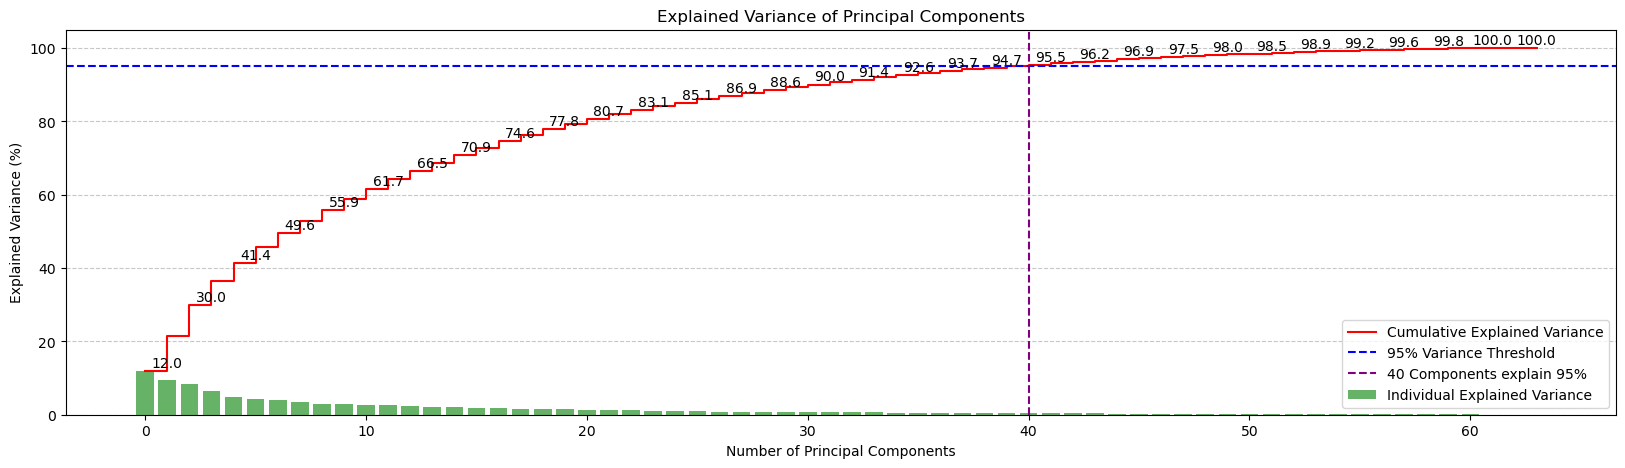

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# Bar plot for individual explained variance
plt.bar(range(len(variance_explained)), variance_explained, label='Individual Explained Variance', color='g', alpha=0.6)

# Step plot for cumulative explained variance
plt.step(range(len(cumulative_variance_explained)), cumulative_variance_explained, where='post', label='Cumulative Explained Variance', color='r')

# Fixing the 95% threshold calculation
n_components_95 = np.where(cumulative_variance_explained >= 95)[0][0] + 1  

# Plot the threshold line at 95% variance
plt.axhline(y=95, color='blue', linestyle='--', label='95% Variance Threshold')

# Vertical line at n_components_95 (should be correct now)
plt.axvline(x=n_components_95, color='purple', linestyle='--', label=f'{n_components_95} Components explain 95%')

# Add text labels at each step
for i, txt in enumerate(cumulative_variance_explained):
    if i % 2 == 0:  # Reduce clutter by labeling every 2nd step
        plt.text(i + 1, txt + 1, f"{txt:.1f}", ha='center', fontsize=10, color='black')

# Labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance of Principal Components')

# Grid, legend, and limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [33]:
np.where(cumulative_variance_explained >= 95)

(array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 61, 62, 63], dtype=int64),)

In [34]:
n_components_95 = np.where(cumulative_variance_explained >= 95)[0][0] + 1
# as indexes start from 0 so 39 is actually the 40th element so we add 1 to get it

In [35]:
n_components_95

40

40 PCs retain 95% of the information, meaning the remaining PCs contribute very little to variance.

If your dataset originally had 64 features (Digits dataset), reducing it to 40 means you've removed 24 less useful features.

In [36]:
cumulative_variance_explained[39]

95.07791125066467

### **Applying PCA and Model Building**

In [37]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)

In [38]:
x_pca.shape

(1797, 40)

In [39]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
x_pca = pca.fit_transform(x_scaled)

In [40]:
x_pca.shape

(1797, 40)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size = 0.25,random_state = 42)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression(max_iter = 1000)

In [45]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = model.predict(x_test)

In [54]:
from sklearn.metrics import *

In [58]:
result = accuracy_score(y_pred,y_test)

In [59]:
result*100

96.88888888888889

In [60]:
confusion_matrix(y_pred,y_test)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 38,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 55,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 56,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 36,  2],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 45]], dtype=int64)

In [62]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       1.00      0.95      0.97        40
           3       0.93      0.98      0.96        44
           4       1.00      0.98      0.99        56
           5       0.95      0.95      0.95        59
           6       0.98      0.98      0.98        45
           7       0.98      1.00      0.99        40
           8       0.95      0.92      0.94        39
           9       0.94      0.96      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



---
# **LDA on Digits Dataset**
---

In [2]:
"""
In a nutshell, LDA is a cool technique used to categorize data into different groups. 
It's like being a super organizer, looking for patterns in information to effectively sort things out. 
Think of it like separating apples from oranges based on their size and color. 
LDA does something similar, but with much more complex data and multiple features!
"""

# import classic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import scikit learn libraries
from sklearn.metrics import *
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
"""
Library for LDA
"""
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
# Load Data
digits = load_digits()

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [31]:
"""
use the dataset to create a dataframe using data as rows and feature_names as column names
"""
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [32]:
# to see entire dataset : print(df.to_string())
print("Rows : ", df.shape[0])
print("Columns : ",df.shape[1])

Rows :  1797
Columns :  64


In [33]:
"""
setting Target/Label columns
"""
df["Target"] = digits.target
df["Target"].unique() # it shows the digits configured in target column

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
df.head(1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0


In [35]:
print("Rows : ", df.shape[0])
print("Columns : ",df.shape[1])

Rows :  1797
Columns :  65


In [37]:
"""
checking pixel values for target present at index 0
"""
print("Target is ", digits.target[4])
digits.data[4]

Target is  4


array([ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
        0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
        7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
        0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
       15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.])

In [38]:
"""
reshaping the pixels into 8x8 matrix = 64 pixels so it could form an image
"""
digits.data[4].reshape(8,8)

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

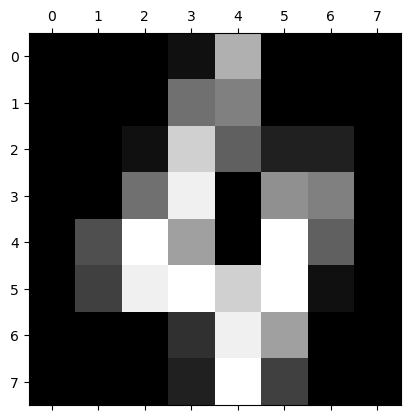

In [39]:
"""
plotting the matrix into an image, on gray scale numbers 0 to 255 represent black to white scale.
"""
plt.gray()
plt.matshow(digits.data[4].reshape(8,8))
plt.show()

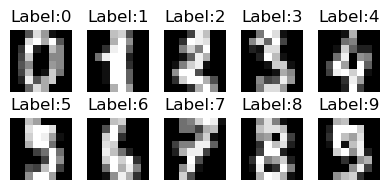

In [41]:
"""
PLot all target images
"""
num_images = 10

plt.figure(figsize=(4,2))
for i in range(num_images):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap = 'gray')
    plt.title(f'Label:{digits.target[i]}')
    plt.axis("off")
plt.tight_layout()
plt.show() 

In [92]:
"""
Split the data into independent and dependent features
if we use df to split 
then when doing standardisation it will be converted into numpy array without columns 
and we will have to convert it into a dataframe again
"""
x = digits.data
y = digits.target

In [93]:
x.shape

(1797, 64)

In [94]:
y.shape

(1797,)

In [95]:
"""
Train - Test Split
"""
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [96]:
"""
Standardisation

If we standardize before splitting, we leak information about the entire dataset, potentially leading to data leakage.
Therefore, we must standardize using only the training data so the test set remains unbiased.
"""
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [97]:
"""
n_components

Inorder to find the number of components required for LDA, we can use a simple formula that is n-1
Just assume there are n persons, so how many lines we would need to distinguish between the given n persons
If incase, you are having less number of features as compared to your classes, you need to use min(no of features, no_of_classes - 1)

In this data, we are having 64 features, and number of classes are 10

So, in this case we would use (n-1) = 9
"""
n_components = min(64,10-1)
n_components

9

In [98]:
"""
Linear Discriminant Analysis model fitting

we will fit and transform data using LDa so we can later use it for model building
"""
LDA = LinearDiscriminantAnalysis(n_components = 9)
x_train = LDA.fit_transform(x_train, y_train)
x_test = LDA.transform(x_test)

In [99]:
# New shape of x_train
x_train.shape

(1347, 9)

In [105]:
"""
'LDA.explained_variance_ratio_' :
How much of the class-discriminative information (variance between classes) is preserved in each Linear Discriminant (LD) component.
no.of elements shown in the printed array : LD1,LD2,etc
"""
LDA.explained_variance_ratio_

array([0.27709518, 0.18867218, 0.17606535, 0.10888121, 0.09038807,
       0.06427354, 0.04249589, 0.03091151, 0.02121708])

In [106]:
"""
sum(lda.explained_variance_ratio_) :
This tells the total class-discriminative variance explained by the selected components.
"""
sum(LDA.explained_variance_ratio_)

1.0

In [107]:
"""
Model Building
"""
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [108]:
pred = model.predict(x_test)

In [109]:
print(f"Accuracy Score: {accuracy_score(y_test, pred)}")

Accuracy Score: 0.9555555555555556


In [110]:
print(confusion_matrix(y_test, pred))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 33  2  0  1  0  0  0  1  0]
 [ 0  1 35  2  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 54  0  0  1  0  0]
 [ 0  0  0  0  0 58  0  0  1  0]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  1  1  0  0  0  2 44]]


In [111]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.94      0.89      0.92        37
           2       0.92      0.92      0.92        38
           3       0.94      0.96      0.95        46
           4       0.93      0.98      0.96        55
           5       0.97      0.98      0.97        59
           6       1.00      0.98      0.99        45
           7       0.98      0.98      0.98        41
           8       0.90      0.95      0.92        38
           9       0.98      0.92      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



In [ ]:
import plotly.express as px
fig = px.scatter(df, x = x_train[:,8], y = y_train,
                 labels={
                     "x": "LD1",
                     "y": "LD2",
                 },
                 opacity=1, color = y_train)


fig.update_layout(dict(plot_bgcolor = 'white'))


fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')


fig.update_layout(title_text="LDA Scatter Plot")

fig.update_traces(marker=dict(size=3))

fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x = x_train[:,0], y = y_train, z = x_train[:,1],
                    labels={
                        "x": "LD1",
                        "y": "LD2",
                        "z": "LD3"
                    },
                    opacity=1, color = y_train)

fig.update_layout(scene=dict(xaxis_backgroundcolor="white",
                             yaxis_backgroundcolor="white",
                             zaxis_backgroundcolor="white"))

fig.update_layout(scene=dict(xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='lightgrey',
                             xaxis_zeroline=True, xaxis_zerolinewidth=1, xaxis_zerolinecolor='lightgrey',
                             xaxis_showline=True, xaxis_linewidth=1, xaxis_linecolor='black',
                             yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='lightgrey',
                             yaxis_zeroline=True, yaxis_zerolinewidth=1, yaxis_zerolinecolor='lightgrey',
                             yaxis_showline=True, yaxis_linewidth=1, yaxis_linecolor='black',
                             zaxis_showgrid=True, zaxis_gridwidth=1, zaxis_gridcolor='lightgrey',
                             zaxis_zeroline=True, zaxis_zerolinewidth=1, zaxis_zerolinecolor='lightgrey',
                             zaxis_showline=True, zaxis_linewidth=1, zaxis_linecolor='black'))

fig.update_layout(title_text="3D LDA Scatter Plot")

fig.update_traces(marker=dict(size=3))

fig.show()
